In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv("./archive/train_dataset.csv")

In [3]:
df.head().style.background_gradient(cmap="summer")

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,35,170,85,97.000000,0.900000,0.900000,1,1,118,78,97,239,153,70,142,19.800000,1,1.000000,61,115,125,1,1
1,20,175,110,110.000000,0.700000,0.900000,1,1,119,79,88,211,128,71,114,15.900000,1,1.100000,19,25,30,1,0
2,45,155,65,86.000000,0.900000,0.900000,1,1,110,80,80,193,120,57,112,13.700000,3,0.600000,1090,1400,276,0,0
3,45,165,80,94.000000,0.800000,0.700000,1,1,158,88,249,210,366,46,91,16.900000,1,0.900000,32,36,36,0,0
4,20,165,60,81.000000,1.500000,0.100000,1,1,109,64,100,179,200,47,92,14.900000,1,1.200000,26,28,15,0,0


In [168]:
df.isna().sum() # checking for any missing values

age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

In [5]:
df1 = df.copy()
print("rows in dataset: ",df1.shape[0])
print("duplicate rows: ",df1.duplicated().sum())
df1 = df1.drop_duplicates()
print("rows after dropping duplicates in  dataset: ",df1.shape[0])

rows in dataset:  38984
duplicate rows:  5517
rows after dropping duplicates in  dataset:  33467


In [11]:
df2 = df1.copy()

target = df2[['smoking']]
target.head()

,smoking
0,1
1,0
2,0
3,0
4,0


<AxesSubplot:xlabel='Urine protein', ylabel='count'>

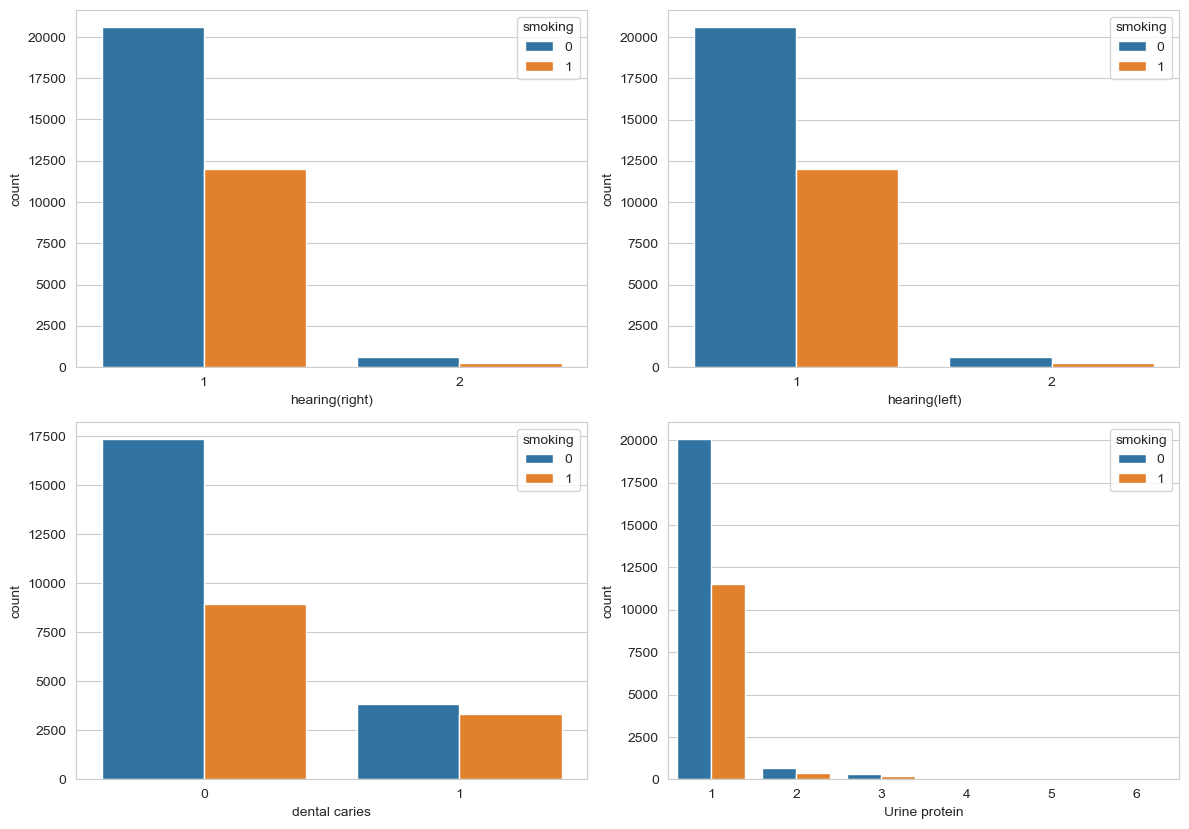

In [173]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.countplot(data=df1,x="hearing(right)",hue='smoking')

plt.subplot(2,2,2)
sns.countplot(data=df1,x="hearing(left)",hue='smoking')
plt.tight_layout(pad=1.1)

plt.subplot(2,2,3)
sns.countplot(data=df1,x="dental caries",hue='smoking')

plt.subplot(2,2,4)
sns.countplot(data=df1,x="Urine protein",hue='smoking')

In [172]:
chi = ['hearing(left)','hearing(right)','dental caries','Urine protein']

for i in range(len(chi)):
    # print(chi[i])
    print('contingency table for '+chi[i]+ " and smoking")
    cross = pd.crosstab(df1[str(chi[i])],df1['smoking'])
    print(cross)
    chi2, p, dof, ex = stats.chi2_contingency(cross)
    print("")
    print('results of chi-Square test for '+chi[i]+ " and smoking")
    print("("+str(chi2)+", "+str(p)+", "+str(dof)+")")
    print("++++++++++++++++++++++++++++++++++++++++++++")

contingency table for hearing(left) and smoking
smoking            0      1
hearing(left)              
1              20612  12006
2                597    252

results of chi-Square test for hearing(left) and smoking
(17.796185766032348, 2.4587565024720927e-05, 1)
++++++++++++++++++++++++++++++++++++++++++++
contingency table for hearing(right) and smoking
smoking             0      1
hearing(right)              
1               20610  11985
2                 599    273

results of chi-Square test for hearing(right) and smoking
(10.681971148699716, 0.0010818472188142405, 1)
++++++++++++++++++++++++++++++++++++++++++++
contingency table for dental caries and smoking
smoking            0     1
dental caries             
0              17360  8922
1               3849  3336

results of chi-Square test for dental caries and smoking
(378.24617641567613, 2.997771257507368e-84, 1)
++++++++++++++++++++++++++++++++++++++++++++
contingency table for Urine protein and smoking
smoking            

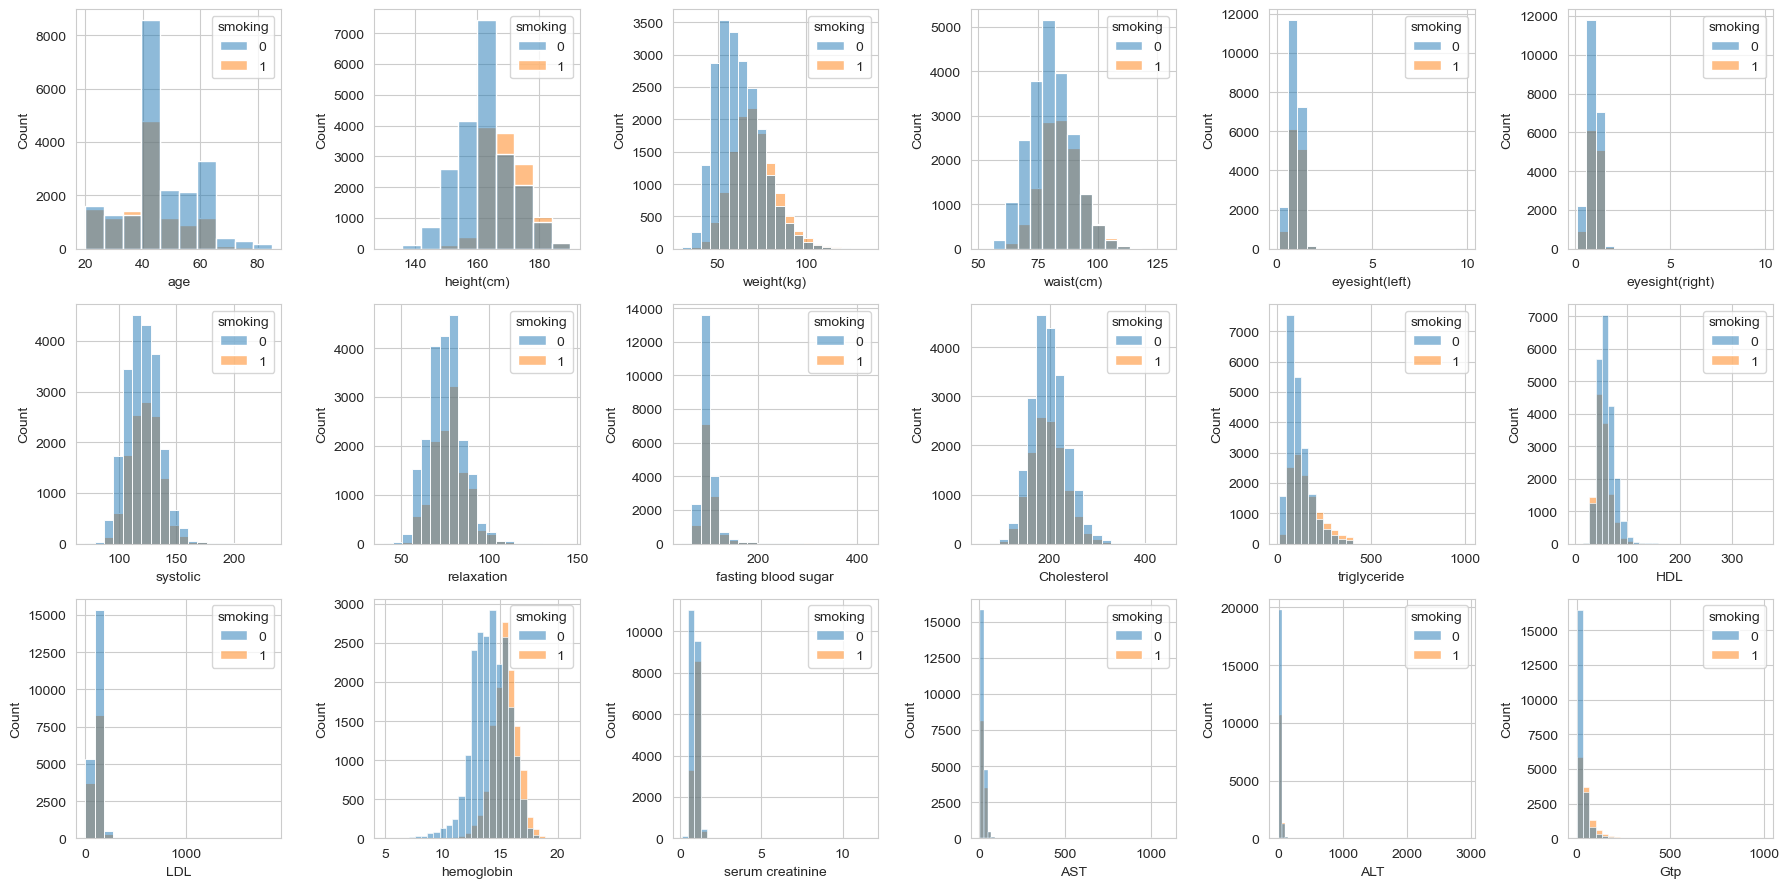

In [166]:
plt.figure(figsize=(18,9))
# plt.tight_layout(pad=1.1)

plt.subplot(3,6,1)
sns.histplot(data=df1, x="age", bins=10,hue='smoking')

plt.subplot(3,6,2)
sns.histplot(data=df1, x="height(cm)", bins=10,hue='smoking')

plt.subplot(3,6,3)
sns.histplot(data=df1, x="weight(kg)", bins=20,hue='smoking')

plt.subplot(3,6,4)
sns.histplot(data=df1, x="waist(cm)", bins=15,hue='smoking')

plt.subplot(3,6,5)
sns.histplot(data=df1, x="eyesight(left)", bins=20,hue='smoking')

plt.subplot(3,6,6)
sns.histplot(data=df1, x="eyesight(right)", bins=20,hue='smoking')

plt.subplot(3,6,7)
sns.histplot(data=df1, x="systolic", bins=20,hue='smoking')

plt.subplot(3,6,8)
sns.histplot(data=df1, x="relaxation", bins=20,hue='smoking')

plt.subplot(3,6,9)
sns.histplot(data=df1, x="fasting blood sugar", bins=20,hue='smoking')

plt.subplot(3,6,10)
sns.histplot(data=df1, x="Cholesterol", bins=20,hue='smoking')

plt.subplot(3,6,11)
sns.histplot(data=df1, x="triglyceride", bins=25,hue='smoking')

plt.subplot(3,6,12)
sns.histplot(data=df1, x="HDL", bins=30,hue='smoking')

plt.subplot(3,6,13)
sns.histplot(data=df1, x="LDL", bins=20,hue='smoking')

plt.subplot(3,6,14)
sns.histplot(data=df1, x="hemoglobin", bins=30,hue='smoking')

plt.subplot(3,6,15)
sns.histplot(data=df1, x="serum creatinine", bins=30,hue='smoking')

plt.subplot(3,6,16)
sns.histplot(data=df1, x="AST", bins=50,hue='smoking')

plt.subplot(3,6,17)
sns.histplot(data=df1, x="ALT", bins=60,hue='smoking')

plt.subplot(3,6,18)
sns.histplot(data=df1, x="Gtp", bins=30,hue='smoking')

plt.tight_layout(pad=1.1)

<AxesSubplot:xlabel='weight(kg)', ylabel='Count'>

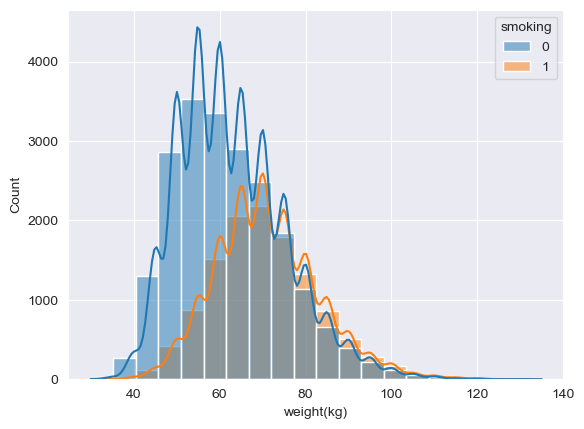

In [165]:
sns.histplot(data=df1, x="weight(kg)", bins=20,hue='smoking',kde=True)

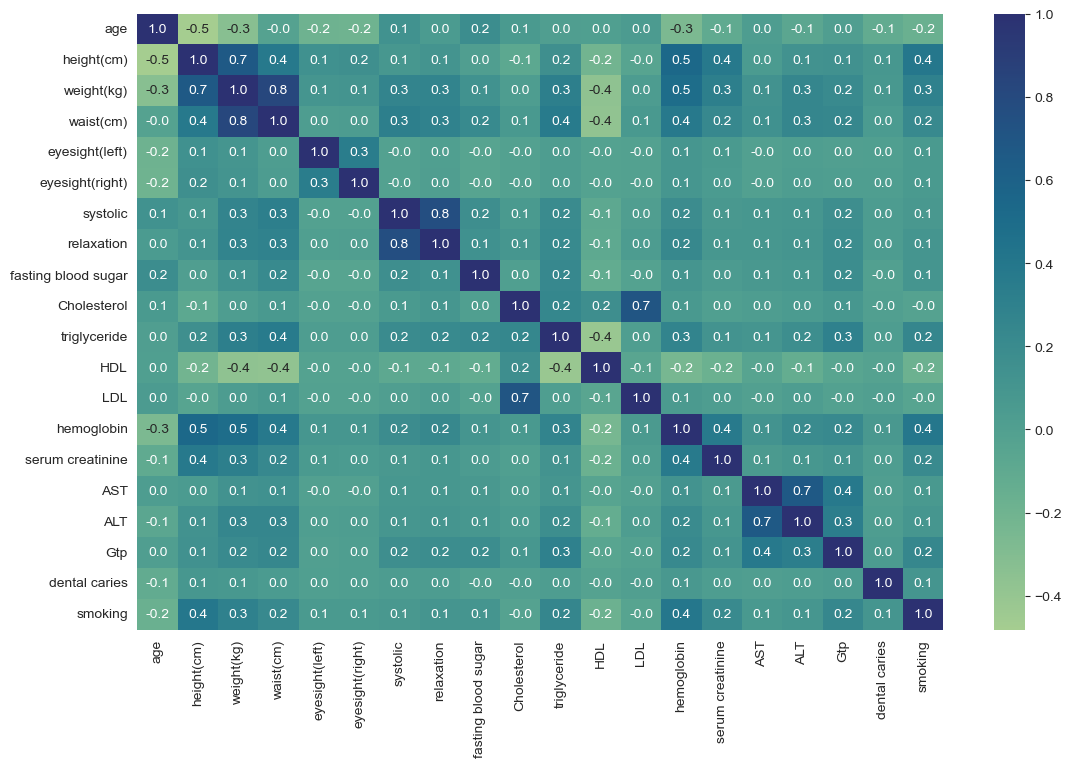

In [178]:
df2 = df1[["age","height(cm)","weight(kg)","waist(cm)","eyesight(left)","eyesight(right)","systolic","relaxation","fasting blood sugar","Cholesterol","triglyceride","HDL","LDL","hemoglobin","serum creatinine","AST","ALT","Gtp","dental caries","smoking"]]

corr = df2.corr()

plt.figure(figsize=(13,8))
s = sns.heatmap(corr, annot=True, fmt=".1f",cmap="crest")

In [174]:
df1.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,33467.000000,33467.000000,33467.000000,33467.000000,33467.000000,33467.000000,33467.000000,33467.000000,33467.000000,33467.000000,...,33467.000000,33467.000000,33467.000000,33467.000000,33467.000000,33467.000000,33467.000000,33467.000000,33467.000000,33467.000000
mean,44.153943,164.684465,65.930319,82.081501,1.013849,1.009553,1.025368,1.026056,121.498730,76.017599,...,57.257537,115.182090,14.624463,1.086533,0.886467,26.195536,27.139929,39.952401,0.214689,0.366271
std,12.071768,9.195867,12.877955,9.310533,0.496245,0.497867,0.157243,0.159303,13.671019,9.672070,...,14.598021,43.159159,1.562414,0.403008,0.222038,18.760580,31.613159,49.965736,0.410613,0.481792
min,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,...,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,26.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,66.000000,136.000000,15.700000,1.000000,1.000000,29.000000,31.000000,44.000000,0.000000,1.000000
max,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,233.000000,146.000000,...,359.000000,1860.000000,21.100000,6.000000,11.600000,1090.000000,2914.000000,999.000000,1.000000,1.000000
